<a href="https://colab.research.google.com/github/aliwagdy2580/Deep-Learning/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#First, import the important libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import cv2
import os
from sklearn.utils import shuffle

import glob as gb


In [2]:
class_names=['buildings','forest','glacier','mountain','sea','street']
img_size=150
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    
    
    class_name_labels={class_names:i for i,class_names in enumerate (class_names) }
    
    for folder in os.listdir(directory):
        
        label=class_name_labels[folder]
        
        path=os.path.join(directory,folder)
        for image in tqdm(os.listdir(path)): #Extracting the file name of the image from Class Label folder
            
            path_image=os.path.join(path,image)
            
            image = cv2.imread(path_image) #Reading the image (OpenCV)
            
            #Resize the image, Some images are different sizes. (Resizing is very Important)
            image = cv2.resize(image,(img_size,img_size)) 
            
            # Append the image and its corresponding label to the output
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {0:'buildings', 1:'forest', 2:'forest', 3:'mountain', 4:'sea', 5:'street'}
    
    return labels[class_code]

In [3]:
images,labels = get_images('drive/MyDrive/archive/seg_train/seg_train') #Extract the training images from the folders.

train_images = np.array(images) #converting the list of images to numpy array.
train_labels = np.array(labels)

100%|██████████| 2191/2191 [13:22<00:00,  2.73it/s]


In [4]:
print(train_images.shape)
print(train_labels.shape)

(14034, 150, 150, 3)
(14034,)


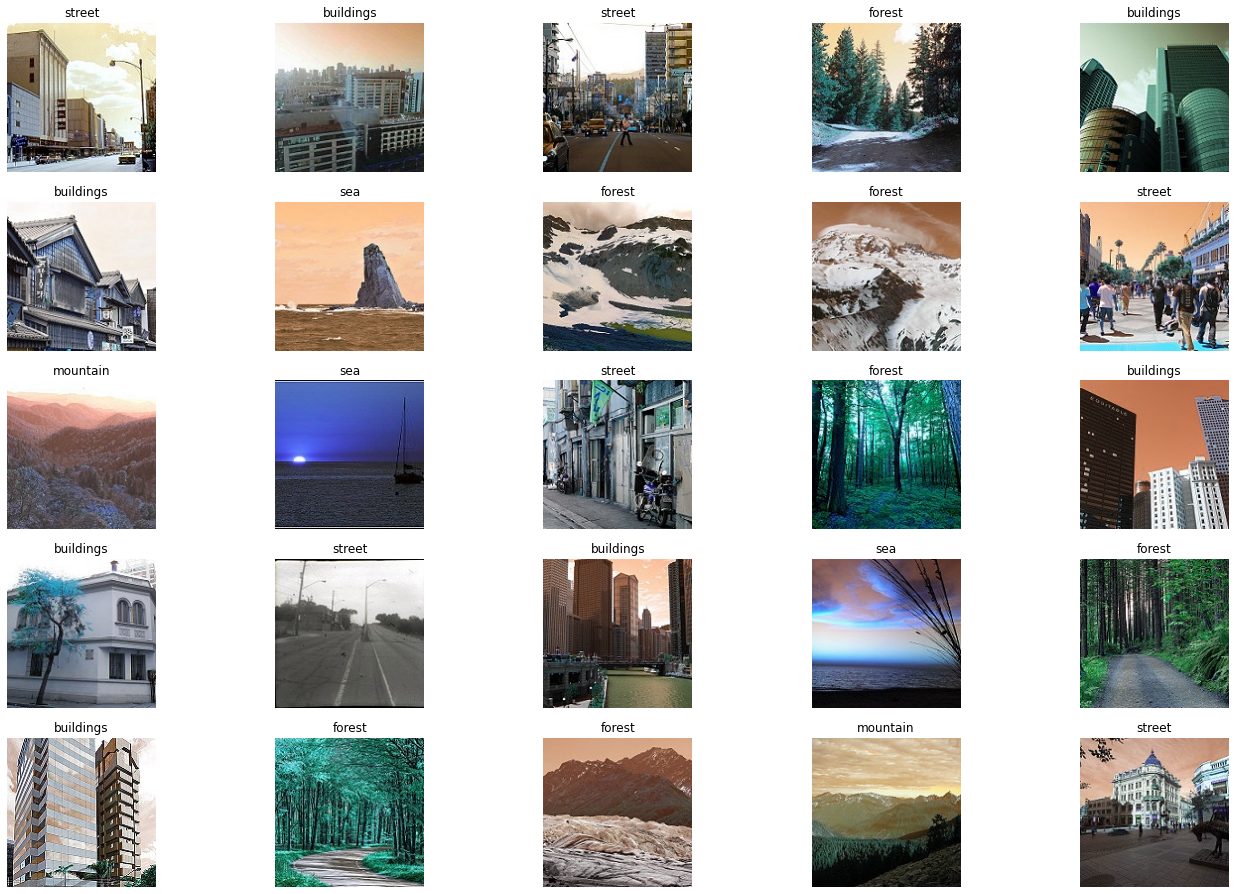

In [5]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5):
    for j in range(0,5):
        rnd_number = np.random.randint(0,len(train_images))
        ax[i,j].imshow(train_images[rnd_number])
        ax[i,j].set_title(get_classlabel(train_labels[rnd_number]))
        ax[i,j].axis('off')
    

In [14]:
model = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 146, 146, 150)     270150    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 150)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 120)       162120    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 80)        86480     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 30, 30, 50)        36050     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 50)         

In [15]:
history=model.fit(train_images,train_labels,epochs=35,validation_split=0.30)

Epoch 1/35
222/307 [====================>.........] - ETA: 18s - loss: 2.7072 - accuracy: 0.3277

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
test_images,test_labels = get_images('../input/intel-image-classification/seg_test/seg_test')
test_images = np.array(test_images)
test_labels = np.array(test_labels)

print(test_images)
print(label_images)


In [ ]:
model.evaluate(test_images,test_labels, verbose=1)

# import prediction datasets

In [ ]:
pred_path='../input/intel-image-classification/seg_pred/'

pred_images = []
for folder in os.listdir(pred_path):
    
    path=os.path.join(pred_path,folder)
    for image in tqdm(os.listdir(path)): #Extracting the file name of the image from Class Label folder

        path_image=os.path.join(path,image)

        image = cv2.imread(path_image) #Reading the image (OpenCV)

        #Resize the image, Some images are different sizes. (Resizing is very Important)
        image = cv2.resize(image,(img_size,img_size)) 

        # Append the image and its corresponding label to the output
        pred_images.append(image)
pred_images=np.array(pred_images)
        
print(pred_images.shape)

In [ ]:
y_pred=model.predict(pred_images)

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(pred_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(pred_images[i])   
    plt.axis('off')
    plt.title(get_classlabel(np.argmax(y_pred[i])))